# Exploring Additional Clustering Models

## Imports/Flags

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift

In [7]:
merged_df = pd.read_pickle("Datasets/merged_dataset")

In [9]:
merged_df.head()

,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,PCH_LACCESS_LOWI_10_15,PCT_LACCESS_LOWI10,PCT_LACCESS_LOWI15,...,PCH_SNAPS_12_16,SNAPSPTH12,SNAPSPTH16,PCH_SNAPSPTH_12_16,WICS08,WICS12,PCH_WICS_08_12,WICSPTH08,WICSPTH12,PCH_WICSPTH_08_12
0,18428.44,17496.69,-5.06,33.77,32.06,5344.43,6543.68,22.44,9.79,11.99,...,12.69,0.67,0.76,12.89,6,5,-16.67,0.12,0.09,-24.41
1,35210.81,30561.26,-13.20,19.32,16.77,9952.14,9886.83,-0.66,5.46,5.42,...,43.19,0.73,0.95,30.99,25,27,8.00,0.14,0.14,-0.25
2,5722.31,6069.52,6.07,20.84,22.11,3135.68,2948.79,-5.96,11.42,10.74,...,0.96,1.28,1.35,5.76,6,7,16.67,0.20,0.26,27.97
3,1044.87,969.38,-7.22,4.56,4.23,491.45,596.16,21.31,2.14,2.60,...,20.51,0.72,0.86,20.27,6,5,-16.67,0.28,0.22,-20.38
4,1548.18,3724.43,140.57,2.70,6.50,609.03,1650.96,171.08,1.06,2.88,...,23.90,0.66,0.82,24.17,10,6,-40.00,0.17,0.10,-40.03


## Scale

In [10]:
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(merged_df)

## Mean Shift

In [25]:
pca = PCA(n_components = 0.9999)
pca.fit(data_rescaled)
mshift_data = pca.transform(data_rescaled)

In [16]:
mshift = MeanShift().fit(mshift_data)

In [17]:
clusters = mshift.predict(mshift_data)

In [20]:
mshift_data["clusters"] = clusters

In [21]:
mshift_data.head()

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,clusters
0,0.020798,0.023636,0.000004,0.3377,0.3206,0.018269,0.025218,0.000005,0.135464,0.166899,...,0.100601,0.125620,0.074048,0.004669,0.003121,0.208325,0.025974,0.030100,0.191819,0
1,0.039738,0.041284,0.000004,0.1932,0.1677,0.034020,0.038103,0.000004,0.075550,0.075445,...,0.109610,0.157025,0.088980,0.019455,0.016854,0.270000,0.030303,0.046823,0.253128,0
2,0.006458,0.008199,0.000005,0.2084,0.2211,0.010719,0.011364,0.000004,0.158019,0.149499,...,0.192192,0.223140,0.068166,0.004669,0.004370,0.291675,0.043290,0.086957,0.324739,0
3,0.001179,0.001309,0.000004,0.0456,0.0423,0.001680,0.002298,0.000005,0.029611,0.036192,...,0.108108,0.142149,0.080137,0.004669,0.003121,0.208325,0.060606,0.073579,0.202045,0
4,0.001747,0.005031,0.000011,0.0270,0.0650,0.002082,0.006363,0.000012,0.014667,0.040089,...,0.099099,0.135537,0.083354,0.007782,0.003745,0.150000,0.036797,0.033445,0.152181,0


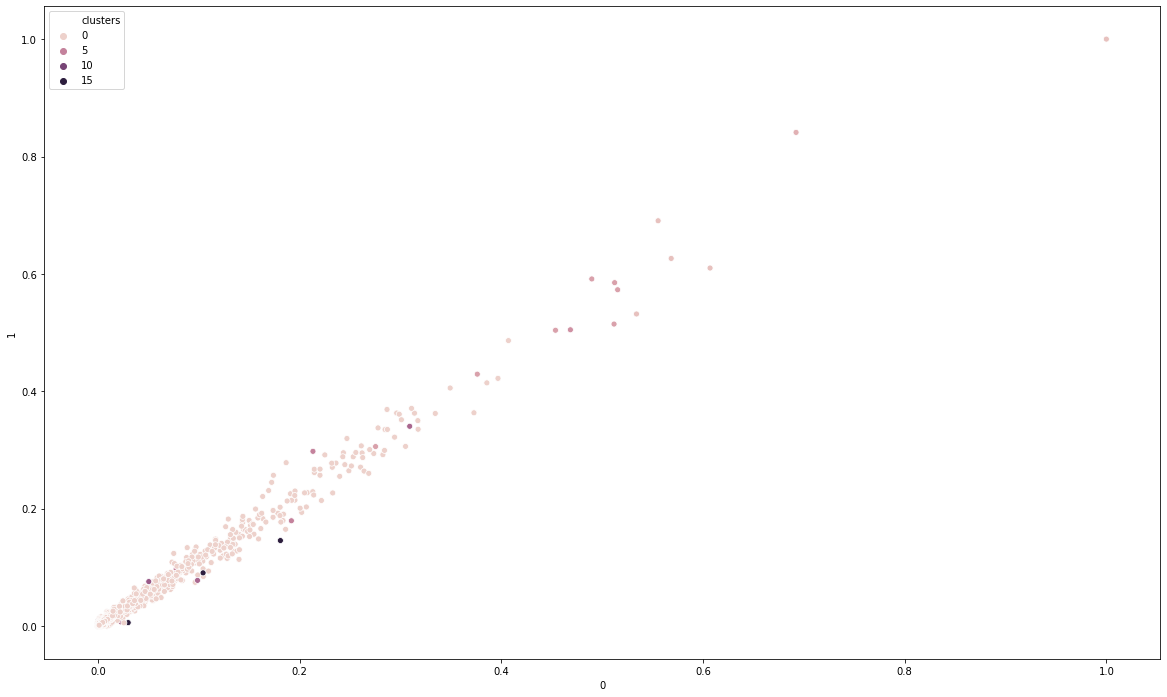

In [24]:
fig, ax = plt.subplots(figsize=(20, 12))
ax = sns.scatterplot(data=mshift_data,
                    x=0,
                    y=1,
                    hue="clusters")